# 0. Setups Paths

In [1]:
from platform import python_version
print(python_version())

3.9.12


In [2]:
import os

In [3]:
#model's custom name
CUSTOM_MODEL_NAME = 'my_faster_r-cnn_resnet50_new-trained-pc'
#model named that downloaded
PRETRAINED_MODEL_NAME = 'faster_rcnn_resnet50_v1_640x640_coco17_tpu-8'
#model url downloaded
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_resnet50_v1_640x640_coco17_tpu-8.tar.gz'
#
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'faces_label_map.pbtxt'

In [4]:
paths = {
    'WORKSPACE_PATH' : os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH' : os.path.join('Tensorflow', 'scripts'),
    'APIMODEL_PATH' : os.path.join('Tensorflow', 'models'),
    'ANNOTATION_PATH' : os.path.join('Tensorflow', 'workspace', 'annotations'),
    'IMAGE_PATH' : os.path.join('Tensorflow', 'workspace', 'images'),
    'MODEL_PATH' : os.path.join('Tensorflow', 'workspace', 'models'),
    'PRETRAINED_MODEL_PATH' : os.path.join('Tensorflow', 'workspace', 'pre-trained-models'),
    'CHECKPOINT_PATH' : os.path.join('Tensorflow', 'workspace', 'models', CUSTOM_MODEL_NAME),
    'OUTPUT_PATH' : os.path.join('Tensorflow', 'workspace', 'models', CUSTOM_MODEL_NAME, 'export'),
    'TFJS_PATH' : os.path.join('Tensorflow', 'workspace', 'models', CUSTOM_MODEL_NAME, 'tfjsexport'),
    'PROTOC_PATH' : os.path.join('Tensorflow', 'protoc')
}

In [5]:
files = {
    'PIPELINE_CONFIG' : os.path.join('Tensorflow', 'workspace', 'models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPTS' : os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME),
    'LABELMAP' : os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [5]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [6]:
# https:www.tensorflow.org/install/source_windows

In [7]:
if os.name == 'nt':
    !pip install wget
    import wget

You should consider upgrading via the 'D:\virtual_env\face_recognition\python.exe -m pip install --upgrade pip' command.


In [11]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'],
                                  'research',
                                  'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

Cloning into 'Tensorflow\models'...
Checking out files:  15% (492/3142)
Checking out files:  16% (503/3142)
Checking out files:  17% (535/3142)
Checking out files:  18% (566/3142)
Checking out files:  19% (597/3142)
Checking out files:  20% (629/3142)
Checking out files:  21% (660/3142)
Checking out files:  22% (692/3142)
Checking out files:  23% (723/3142)
Checking out files:  24% (755/3142)
Checking out files:  25% (786/3142)
Checking out files:  26% (817/3142)
Checking out files:  27% (849/3142)
Checking out files:  28% (880/3142)
Checking out files:  29% (912/3142)
Checking out files:  30% (943/3142)
Checking out files:  31% (975/3142)
Checking out files:  32% (1006/3142)
Checking out files:  33% (1037/3142)
Checking out files:  34% (1069/3142)
Checking out files:  35% (1100/3142)
Checking out files:  36% (1132/3142)
Checking out files:  37% (1163/3142)
Checking out files:  38% (1194/3142)
Checking out files:  39% (1226/3142)
Checking out files:  40% (1257/3142)
Checking out files:

In [9]:
# Install Tensorflow Object Detection
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

100% [..........................................................................] 1468733 / 1468733        1 file(s) moved.
        1 file(s) copied.
running build
running build_py
copying object_detection\protos\anchor_generator_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\argmax_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\bipartite_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_coder_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_predictor_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\calibration_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\center_net_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\eval_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\faster_rcnn_box_coder_pb2.py -> build\lib\object_detection\protos
copying obj

D:\virtual_env\face_recognition\lib\site-packages\setuptools\_distutils\cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
D:\virtual_env\face_recognition\lib\site-packages\setuptools\_distutils\cmd.py:66: EasyInstallDeprecationWarning: easy_install command is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` and ``easy_install``.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See h

        1 file(s) copied.
running build
running build_py
copying object_detection\protos\anchor_generator_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\argmax_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\bipartite_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_coder_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_predictor_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\calibration_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\center_net_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\eval_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\faster_rcnn_box_coder_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\faster_rcnn_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\flexible_grid_a

D:\virtual_env\face_recognition\lib\site-packages\setuptools\_distutils\cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
D:\virtual_env\face_recognition\lib\site-packages\setuptools\_distutils\cmd.py:66: EasyInstallDeprecationWarning: easy_install command is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` and ``easy_install``.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See h

Obtaining file:///D:/Nurina/Tensorflow/models/research/slim
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Attempting uninstall: slim
    Found existing installation: slim 0.1
    Uninstalling slim-0.1:
      Successfully uninstalled slim-0.1
  Running setup.py develop for slim


You should consider upgrading via the 'D:\virtual_env\face_recognition\python.exe -m pip install --upgrade pip' command.


In [21]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

2023-07-04 15:05:42.501163: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2023-07-04 15:05:42.501195: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-07-04 15:05:52.133787: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2023-07-04 15:05:52.134848: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cublas64_11.dll'; dlerror: cublas64_11.dll not found
2023-07-04 15:05:52.135885: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cublasLt64_11.dll'; dlerror: cublasLt64_11.dll not found
2023-07-04 15:05:52.240769: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cu

In [9]:
import google

In [19]:
!pip list

Package                       Version              Editable project location
----------------------------- -------------------- -----------------------------------------
absl-py                       1.4.0
aiohttp                       3.8.1
aiosignal                     1.2.0
alabaster                     0.7.12
anaconda-client               1.8.0
anaconda-project              0.11.1
anyio                         3.6.1
apache-beam                   2.41.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.12.9
astropy                       5.1
asttokens                     2.0.8
astunparse                    1.6.3
async-timeout                 4.0.2
atomicwrites                  1.4.1
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
avro-python3                  1.10.2
Babel                         2

You should consider upgrading via the 'D:\virtual_env\face_recognition\python.exe -m pip install --upgrade pip' command.


In [11]:
!conda install protobuf

^C


In [ ]:
# !pip install gast
# !pip install termcolor
# !pip install flatbuffers
!conda install -c conda-forge keras-preprocessing

In [10]:
!pip install opt_einsum

  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-gpu 2.8.0 requires astunparse>=1.6.0, which is not installed.
tensorflow-gpu 2.8.0 requires flatbuffers>=1.12, which is not installed.
tensorflow-gpu 2.8.0 requires gast>=0.2.1, which is not installed.
tensorflow-gpu 2.8.0 requires google-pasta>=0.1.1, which is not installed.
tensorflow-gpu 2.8.0 requires keras-preprocessing>=1.1.1, which is not installed.
tensorflow-gpu 2.8.0 requires tensorboard<2.9,>=2.8, which is not installed.
tensorflow-gpu 2.8.0 requires termcolor>=1.1.0, which is not installed.
tensorflow 2.9.2 requires astunparse>=1.6.0, which is not installed.
tensorflow 2.9.2 requires flatbuffers<2,>=1.12, which is not installed.
tensorflow 2.9.2 requires gast<=0.4.0,>=0.2.1, which is not installed.
tensorflow 2.9.2 requires google-pasta>=0.1.1, which is not installed.
tensorflow 2.9.2 requir

In [16]:
!pip install astunparse

  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-gpu 2.8.0 requires flatbuffers>=1.12, which is not installed.
tensorflow-gpu 2.8.0 requires google-pasta>=0.1.1, which is not installed.
tensorflow-gpu 2.8.0 requires keras-preprocessing>=1.1.1, which is not installed.
tensorflow-gpu 2.8.0 requires tensorboard<2.9,>=2.8, which is not installed.
tensorflow-gpu 2.8.0 requires termcolor>=1.1.0, which is not installed.
tensorflow 2.9.2 requires flatbuffers<2,>=1.12, which is not installed.
tensorflow 2.9.2 requires google-pasta>=0.1.1, which is not installed.
tensorflow 2.9.2 requires keras-preprocessing>=1.1.1, which is not installed.
tensorflow 2.9.2 requires tensorboard<2.10,>=2.9, which is not installed.
tensorflow 2.9.2 requires tensorflow-estimator<2.10.0,>=2.9.0rc0, which is not installed.
tensorflow 2.9.2 requires termcolor>=1.1.0, which is not inst

In [10]:
!pip install tensorflow --upgrade

     ------------------------------------ 455.9/455.9 MB 422.4 kB/s eta 0:00:00
  Using cached typing_extensions-4.3.0-py3-none-any.whl (25 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
     ------------------------------------ 438.7/438.7 kB 571.3 kB/s eta 0:00:00
  Using cached h5py-3.7.0-cp37-cp37m-win_amd64.whl (2.6 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
     ---------------------------------------- 1.5/1.5 MB 542.1 kB/s eta 0:00:00
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
     -------------------------------------- 14.2/14.2 MB 493.4 kB/s eta 0:00:00
     ------------------------------------ 896.6/896.6 kB 484.9 kB/s eta 0:00:00
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
     ---------------------------------------- 5.9/5.9 MB 503.7 kB/s eta 0:00:00
     ---------------------------------------- 3.6/3.6 MB 385.5 kB/s eta 0:00:00
  Using cached wh

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-models-official 2.9.2 requires gin-config, which is not installed.
tf-models-official 2.9.2 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.9.2 requires kaggle>=1.3.9, which is not installed.
tf-models-official 2.9.2 requires matplotlib, which is not installed.
tf-models-official 2.9.2 requires oauth2client, which is not installed.
tf-models-official 2.9.2 requires opencv-python-headless, which is not installed.
tf-models-official 2.9.2 requires pandas>=0.22.0, which is not installed.
tf-models-official 2.9.2 requires Pillow, which is not installed.
tf-models-official 2.9.2 requires py-cpuinfo>=3.3.0, which is not installed.
tf-models-official 2.9.2 requires pycocotools, which is not installed.
tf-models-official 2.9.2 requires pyyaml<6.0,>=5.1, which is not installed.
tf-

In [19]:
!python -m pip install --upgrade pip==22.2

  Using cached pip-22.2-py3-none-any.whl (2.0 MB)
  Attempting uninstall: pip
    Found existing installation: pip 22.2.1
    Uninstalling pip-22.2.1:
      Successfully uninstalled pip-22.2.1


In [12]:
!pip uninstall protobuf matplotlib -y
!pip install protobuf matplotlib==3.2
#!pip install matplotlib==3.2
#!pip install --upgrade "protobuf<=3.2"

Found existing installation: protobuf 3.20.2
Uninstalling protobuf-3.20.2:
  Successfully uninstalled protobuf-3.20.2
Found existing installation: matplotlib 3.5.3
Uninstalling matplotlib-3.5.3:
  Successfully uninstalled matplotlib-3.5.3


  Using cached protobuf-4.23.3-cp39-cp39-win_amd64.whl (422 kB)
     -------------------                     20.2/40.5 MB 24.4 kB/s eta 0:13:54


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\unhas\AppData\Roaming\Python\Python39\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\unhas\AppData\Roaming\Python\Python39\site-packages\pip\_vendor\urllib3\response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "C:\Users\unhas\AppData\Roaming\Python\Python39\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
  File "D:\virtual_env\face_recognition\lib\http\client.py", line 463, in read
    n = self.readinto(b)
  File "D:\virtual_env\face_recognition\lib\http\client.py", line 507, in readinto
    n = self.fp.readinto(b)
  File "D:\virtual_env\face_recognition\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "D:\virtual_env\face_recognition\lib\ssl.py", line 1241, in recv_into
    return self.read(nbytes, buffer)
  File "D:\virtual_env\face_

In [27]:
!pip install Pillow


[notice] A new release of pip available: 22.2 -> 22.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
!pip install pyyaml


[notice] A new release of pip available: 22.2 -> 22.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
!pip list

You should consider upgrading via the 'D:\virtual_env\face_recognition\python.exe -m pip install --upgrade pip' command.


Package                       Version              Editable project location
----------------------------- -------------------- -----------------------------------------
absl-py                       1.2.0
aiohttp                       3.8.1
aiosignal                     1.2.0
alabaster                     0.7.12
anaconda-client               1.8.0
anaconda-project              0.11.1
anyio                         3.6.1
apache-beam                   2.41.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.12.9
astropy                       5.1
asttokens                     2.0.8
astunparse                    1.6.3
async-timeout                 4.0.2
atomicwrites                  1.4.1
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
avro-python3                  1.10.2
Babel                         2

In [11]:
if os.name == 'posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

100% [......................................................................] 211996178 / 211996178        1 file(s) moved.


x faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/
x faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/checkpoint/
x faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/checkpoint/checkpoint
x faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/checkpoint/ckpt-0.index
x faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/pipeline.config
x faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/saved_model/
x faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/saved_model/saved_model.pb
x faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/saved_model/variables/
x faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
x faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/saved_model/variables/variables.index


# 2. Create Label Map

In [6]:
import object_detection

In [7]:
labels = [{"name": "Eliezer Render Rambupadang", id: 1, "display_name": "Eliezer Render Rambupadang"},
          {"name": "Fahri Faisal", id: 2, "display_name": "Fahri Faisal"},
          {"name": "M Hardian Jusuf Herdiansyah", id: 3, "display_name": "M Hardian Jusuf Herdiansyah"},
          {"name": "Mohammad Aqsha Arianto Latief", id: 4, "display_name": "Mohammad Aqsha Arianto Latief"},
          {"name": "Muh Ilham Efendi", id: 5, "display_name": "Muh Ilham Efendi"},
          {"name": "Muh Wira Ramadhani Fadhil", id: 6, "display_name": "Muh Wira Ramadhani Fadhil"},
          {"name": "Muhammad Fadhel H", id: 7, "display_name": "Muhammad Fadhel H"},
          {"name": "Thoriq Akbar Virgiawan", id: 8, "display_name": "Thoriq Akbar Virgiawan"},
]

In [ ]:
with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('items{ \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 3. Create TF records

In [ ]:
####OPTIONAL IF RUNNING ON COLAB
# ARCHIEVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
# if os.path.exists(ARCHIVE_FILES):
#     !tar -zxvf {ARCIVE_FILES}

In [13]:
if not os.path.exists(files['TF_RECORD_SCRIPTS']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

Cloning into 'Tensorflow\scripts'...


In [14]:
!python {files['TF_RECORD_SCRIPTS']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} - o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')}
!python {files['TF_RECORD_SCRIPTS']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')}

usage: generate_tfrecord.py [-h] [-x XML_DIR] [-l LABELS_PATH]
                            [-o OUTPUT_PATH] [-i IMAGE_DIR] [-c CSV_PATH]
generate_tfrecord.py: error: unrecognized arguments: - o Tensorflow\workspace\annotations\train.record
Traceback (most recent call last):
  File "D:\virtual_env\face_recognition\lib\site-packages\object_detection-0.1-py3.9.egg\object_detection\utils\label_map_util.py", line 171, in load_labelmap
    text_format.Merge(label_map_string, label_map)
  File "d:\virtual_env\face_recognition\lib\site-packages\google\protobuf\text_format.py", line 746, in Merge
    return MergeLines(
  File "d:\virtual_env\face_recognition\lib\site-packages\google\protobuf\text_format.py", line 820, in MergeLines
    return parser.MergeLines(lines, message)
  File "d:\virtual_env\face_recognition\lib\site-packages\google\protobuf\text_format.py", line 845, in MergeLines
    self._ParseOrMerge(lines, message)
  File "d:\virtual_env\face_recognition\lib\site-packages\google\pro

# 4. Copy Model Config to Training Folder

In [20]:
if os.name == 'posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

        1 file(s) copied.


# 5. Update Config For Transfer Learning

In [8]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [9]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [25]:
config

{'model': faster_rcnn {
   num_classes: 8
   image_resizer {
     keep_aspect_ratio_resizer {
       min_dimension: 640
       max_dimension: 640
       pad_to_max_dimension: true
     }
   }
   feature_extractor {
     type: "faster_rcnn_resnet50_keras"
     batch_norm_trainable: true
   }
   first_stage_anchor_generator {
     grid_anchor_generator {
       height_stride: 16
       width_stride: 16
       scales: 0.25
       scales: 0.5
       scales: 1.0
       scales: 2.0
       aspect_ratios: 0.5
       aspect_ratios: 1.0
       aspect_ratios: 2.0
     }
   }
   first_stage_box_predictor_conv_hyperparams {
     op: CONV
     regularizer {
       l2_regularizer {
         weight: 0.0
       }
     }
     initializer {
       truncated_normal_initializer {
         stddev: 0.009999999776482582
       }
     }
   }
   first_stage_nms_score_threshold: 0.0
   first_stage_nms_iou_threshold: 0.699999988079071
   first_stage_max_proposals: 300
   first_stage_localization_loss_weight: 2.0


In [21]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:
    proto_str = f.read()
    text_format.Merge(proto_str, pipeline_config)

In [22]:
pipeline_config.model.faster_rcnn.num_classes = len(labels)
pipeline_config.train_config.batch_size = 2
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path = files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train_CCTV.tfrecord')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test_CCTV.tfrecord')]

In [23]:
config_text = text_format.MessageToString(pipeline_config)
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:
    f.write(config_text)

# 6. Train the Model

In [9]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [27]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=10000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [17]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_faster_r-cnn_resnet50 --pipeline_config_path=Tensorflow\workspace\models\my_faster_r-cnn_resnet50\pipeline.config --num_train_steps=10000


In [ ]:
!{command}

### 7. Evaluate the Model

In [10]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [11]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_faster_r-cnn_resnet50 --pipeline_config_path=Tensorflow\workspace\models\my_faster_r-cnn_resnet50\pipeline.config --checkpoint_dir=Tensorflow\workspace\models\my_faster_r-cnn_resnet50


In [ ]:
!{command}

### 8. Load Train Model From Checkpoint

In [10]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [11]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-11')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

### 9. Detect from image

In [12]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [13]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [18]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'CLIP_20230616-154021 41.jpg')

INFO:tensorflow:depth of additional conv before box predictor: 0
Instructions for updating:
Use ref() instead.


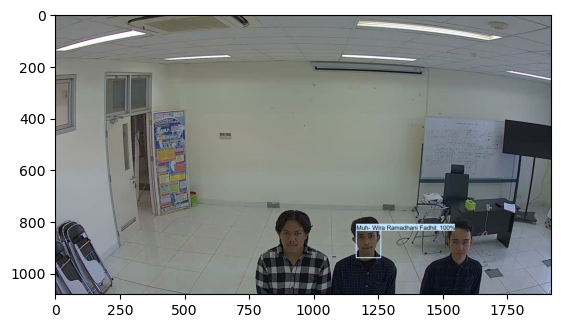

In [19]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
import glob
TEST_IMAGE_PATHS = glob.glob(os.path.join(paths['IMAGE_PATH'], 'test', '*.jpg*'))
assert len (TEST_IMAGE_PATHS) > 0, 'No image found in `{}`.'.format(paths['IMAGE_PATH'])
print(TEST_IMAGE_PATHS)

In [ ]:
from PIL import Image
#IMPORT GOOGLE COLAB FILES MODULE TO DOWNLOAD
from google.colab import files as filedownload

for image_path in TEST_IMAGE_PATHS:
  #img = Image.open(image_path).convert('RGB')
    img = cv2.imread(image_path)
    image_np = np.array(img)

  #input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    input_tensor = tf.convert_to_tensor(np.expand_dims(img, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                for key, value in detections.items()}
    detections['num_detections'] = num_detections
    
    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)
    
    label_id_offset = 1
    image_np_with_detections = image_np.copy()
    image_np_with_detections_uint8 = image_np_with_detections.astype(np.uint8)
    
    viz_utils.visualize_boxes_and_labels_on_image_array(
              img,
              #image_np_with_detections,
              #image_np_with_detections_uint8,
              detections['detection_boxes'],
              detections['detection_classes']+label_id_offset,
              detections['detection_scores'],
              category_index,
              use_normalized_coordinates=True,
              #use_normalized_coordinates=False,
              max_boxes_to_draw=5,
              min_score_thresh=.7,
              line_thickness=10,
              #agnostic_mode=True)
              agnostic_mode=False)
    
    fig = plt.figure(dpi=170)
    #plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    
    #for save each image
    #plt.imshow(Image.fromarray(image_np_with_detections))
    plt.show()
  

### 10. Detection from video

In [ ]:
!pip uninstall opencv-python-headless -y

In [14]:
#from google.colab.patches import cv2_imshow
import cv2
cap = cv2.VideoCapture('D:/Nurina/Tensorflow/workspace/images/Video/CLIP_20230608-143304.mp4')
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened():
    ret, frame = cap.read()
    image_np = np.array(frame)

    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)

    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.7,
                agnostic_mode=False)

    #cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (1920, 1080)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

INFO:tensorflow:depth of additional conv before box predictor: 0
Instructions for updating:
Use ref() instead.


### saving from video

In [17]:
#from google.colab.patches import cv2_imshow
import cv2
cap = cv2.VideoCapture('D:/Nurina/Tensorflow/workspace/images/Video/CLIP_20230608-143304.mp4')
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

size = (width, height)

result = cv2.VideoWriter('filename_non-mask_single.avi', 
                         cv2.VideoWriter_fourcc(*'MJPG'),
                         30, size)

while(True):
    ret, frame = cap.read()
    
    if ret == True:
        image_np = np.array(frame)

        input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
        detections = detect_fn(input_tensor)

        num_detections = int(detections.pop('num_detections'))
        detections = {key: value[0, :num_detections].numpy()
                      for key, value in detections.items()}
        detections['num_detections'] = num_detections

        # detection_classes should be ints.
        detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

        label_id_offset = 1
        image_np_with_detections = image_np.copy()

        viz_utils.visualize_boxes_and_labels_on_image_array(
                    image_np_with_detections,
                    detections['detection_boxes'],
                    detections['detection_classes']+label_id_offset,
                    detections['detection_scores'],
                    category_index,
                    use_normalized_coordinates=True,
                    max_boxes_to_draw=5,
                    min_score_thresh=.7,
                    agnostic_mode=False)
        
        result.write(image_np_with_detections)
        cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
        
    else:
        break
            
cap.release()
result.release()
cv2.destroyAllWindows()
print('The video was successfully saved')

The video was successfully saved


In [5]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')
print(tf.reduce_sum(tf.random.normal([1000, 1000])))

tf.Tensor(1640.4583, shape=(), dtype=float32)


In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12011142049686053504
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6926893056
locality {
  bus_id: 1
  links {
  }
}
incarnation: 9925649516540892286
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1080, pci bus id: 0000:01:00.0, compute capability: 6.1"
xla_global_id: 416903419
]


In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

### 11. Freezing the Graph

In [15]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [16]:
command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])

In [17]:
print(command)

python Tensorflow\models\research\object_detection\exporter_main_v2.py  --input_type=image_tensor --pipeline_config_path=Tensorflow\workspace\models\my_faster_r-cnn_resnet50\pipeline.config --trained_checkpoint_dir=Tensorflow\workspace\models\my_faster_r-cnn_resnet50 --output_directory=Tensorflow\workspace\models\my_faster_r-cnn_resnet50\export


In [ ]:
!{command}

### 12. Real Time

In [22]:
import os

In [23]:
import tensorflow as tf
import os
import time
import sys
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from PIL import Image
import pathlib
import pandas as pd

from object_detection.utils import label_map_util

from object_detection.utils import visualization_utils as vis_util


In [9]:
!pip install protobuf==3.20

  Using cached protobuf-3.20.0-cp39-cp39-win_amd64.whl (904 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.0
    Uninstalling protobuf-3.19.0:
      Successfully uninstalled protobuf-3.19.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-datasets 4.6.0 requires etils[epath], which is not installed.
tensorflow-datasets 4.6.0 requires promise, which is not installed.
tensorflow-datasets 4.6.0 requires tensorflow-metadata, which is not installed.
google-api-python-client 2.61.0 requires google-auth-httplib2>=0.1.0, which is not installed.
google-api-python-client 2.61.0 requires uritemplate<5,>=3.0.1, which is not installed.
tensorflow-gpu 2.8.0 requires keras<2.9,>=2.8.0rc0, but you have keras 2.9.0 which is incompatible.
tensorflow-gpu 2.8.0 requires tensorboard<2.9,>=2.8, but you have tensorboard 2.9.1 which is incompatible.
tensorboard 2.9.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.0 which is incompatible.
google-api-core 2.10.1 requires protobuf<5.0.0dev,>=3.20.1, but you have protobuf 3.20.0 which is incompatible.
a

In [5]:
import tensorflow_text

ImportError: cannot import name 'dtensor' from 'tensorflow.compat.v2.experimental' (C:\Users\unhas\AppData\Roaming\Python\Python39\site-packages\tensorflow\_api\v2\compat\v2\experimental\__init__.py)

In [ ]:
!pip uninstall tensorflow absl-py astunparse flatbuffers gast google-pasta grpcio h5py keras keras-preprocessing libclang numpy opt-einsum protobuf setuptools six tensorboard tensorflow-io-gcs-filesystem termcolor tf-estimator-nightly typing-extensions wrapt

In [27]:
path_model = 'D:/Nurina/Tensorflow/workspace/models/my_faster_r-cnn_resnet50/export/saved_model'

In [28]:
#load model from path
detection_model = tf.saved_model.load(path_model)

FileNotFoundError: Op type not registered 'DisableCopyOnRead' in binary running on E3150101-04. Make sure the Op and Kernel are registered in the binary running in this process. Note that if you are loading a saved graph which used ops from tf.contrib, accessing (e.g.) `tf.contrib.resampler` should be done before importing the graph, as contrib ops are lazily registered when the module is first accessed.
 You may be trying to load on a different device from the computational device. Consider setting the `experimental_io_device` option in `tf.saved_model.LoadOptions` to the io_device such as '/job:localhost'.

In [25]:
#load the label_map
PATH_TO_LABELS = os.path.join(paths['ANNOTATION_PATH'], 'faces_label_map.pbtxt')
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

In [26]:
category_index

{1: {'id': 1, 'name': 'Eliezer Render Rambupadang'},
 2: {'id': 2, 'name': 'Fahri Faisal'},
 3: {'id': 3, 'name': 'M- Hardian Jusuf Herdiansyah'},
 4: {'id': 4, 'name': 'Mohammad Aqsha Arianto Latief'},
 5: {'id': 5, 'name': 'Muh- Ilham Efendi'},
 6: {'id': 6, 'name': 'Muh- Wira Ramadhani Fadhil'},
 7: {'id': 7, 'name': 'Muhammad Fadhel H'},
 8: {'id': 8, 'name': 'Thoriq Akbar Virgiawan'}}

In [ ]:
import cv2

cap = cv2.VideoCapture('D:/Nurina/Tensorflow/workspace/images/Video/CLIP_20230608-143304.mp4')

width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while 1:
    _,img = cap.read()
    
    img = cv2.cvtColor(img, cv2.COLOR_BRG2RGB)
    final_img = show_inference(detection_model, img)
    
    final_img = cv2.cvtColor(final_img, cv2.COLOR_RGB2BGR)
    
    cv2.imshow('object detection', cv2.resize(final_img, (640, 480)))
    
    if cv2.waitKey(1) == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

In [10]:
!pip install tensorflow_text

  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     ------------------------------------ 895.9/895.9 KB 636.7 kB/s eta 0:00:00
  Using cached tensorboard-2.9.1-py3-none-any.whl (5.8 MB)
  Using cached tensorflow_estimator-2.9.0-py2.py3-none-any.whl (438 kB)
  Using cached keras-2.9.0-py2.py3-none-any.whl (1.6 MB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
  Using cached oauthlib-3.2.2-py3-none-any.whl (151 kB)
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 2.0.7
    Uninstalling flatbuffers-2.0.7:
      Successfully uninstalled flatbuffers-2.0.7
  Attempting uninstall: protobuf
    Found ex

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'D:\\virtual_env\\face_recognition\\lib\\site-packages\\google\\~-otobuf\\internal\\_api_implementation.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'D:\virtual_env\face_recognition\python.exe -m pip install --upgrade pip' command.


### saving video

In [1]:
import cv2
  
   
# Create an object to read 
# from camera
video = cv2.VideoCapture('D:/Nurina/Tensorflow/workspace/images/Video/CLIP_20230608-143304.mp4')
   
# We need to check if camera
# is opened previously or not
if (video.isOpened() == False): 
    print("Error reading video file")
  
# We need to set resolutions.
# so, convert them from float to integer.
frame_width = int(video.get(3))
frame_height = int(video.get(4))
   
size = (frame_width, frame_height)
   
# Below VideoWriter object will create
# a frame of above defined The output 
# is stored in 'filename.avi' file.
result = cv2.VideoWriter('filename.avi', 
                         cv2.VideoWriter_fourcc(*'MJPG'),
                         10, size)
    
while(True):
    ret, frame = video.read()
  
    if ret == True: 
  
        # Write the frame into the
        # file 'filename.avi'
        result.write(frame)
  
        # Display the frame
        # saved in the file
        cv2.imshow('Frame', frame)
  
        # Press S on keyboard 
        # to stop the process
        if cv2.waitKey(1) & 0xFF == ord('s'):
            break
  
    # Break the loop
    else:
        break
  
# When everything done, release 
# the video capture and video 
# write objects
video.release()
result.release()
    
# Closes all the frames
cv2.destroyAllWindows()
   
print("The video was successfully saved")

The video was successfully saved
